In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whoscryinginyourroom","key":"36bbbc8019bc72532360dcad224b92f3"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d whoscryinginyourroom/dataset-jeruk

 85% 33.0M/38.7M [00:00<00:00, 42.9MB/s]
100% 38.7M/38.7M [00:00<00:00, 51.7MB/s]


In [5]:
!unzip dataset-jeruk.zip

Archive:  dataset-jeruk.zip
  inflating: Prediksi/Matang/images (1).jpeg  
  inflating: Prediksi/Matang/images (2).jpeg  
  inflating: Prediksi/Matang/images.jpeg  
  inflating: Prediksi/Mentah/images (1).jpeg  
  inflating: Prediksi/Mentah/images (3).jpeg  
  inflating: Prediksi/Mentah/images.jpeg  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.50.14 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.50.19 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.50.28 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.50.33 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.50.54 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.51.47 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.52.03 PM.png  
  inflating: Testing/Matang/rotated_by_15_Screen Shot 2018-06-12 at 11.52.12 PM.png  
  inflatin

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_path='Training'

class_name=sorted(os.listdir(data_path))
class_name

['Matang', 'Mentah']

In [8]:
n_classes = len(class_name)
print(f"Total Number of Classes : {n_classes}")

Total Number of Classes : 2


In [9]:
class_dis = [len(os.listdir(os.path.join(data_path, name))) for name in class_name]
class_dis

[150, 150]

In [41]:
gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True, 
    rotation_range=20,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.5, 1.5]
)

train_generator = gen.flow_from_directory(
    'Training',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Matang', 'Mentah'])

test_generator = gen.flow_from_directory(
    'Testing',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=['Matang', 'Mentah'])

Found 300 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [42]:
model=Sequential()

In [43]:
# Blok Konvolusi 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok Konvolusi 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [44]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_66 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_67 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_68 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_69 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

In [46]:
# Melatih model
model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=15,
    verbose=1,
    validation_data=test_generator,
    shuffle=True,
    validation_steps=len(test_generator))

Epoch 1/15
10/10 [==============================] - 19s 1s/step - loss: 1.1467 - accuracy: 0.5267 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/15
10/10 [==============================] - 12s 1s/step - loss: 0.6963 - accuracy: 0.4867 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/15
10/10 [==============================] - 12s 1s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5300
Epoch 4/15
10/10 [==============================] - 12s 1s/step - loss: 0.6746 - accuracy: 0.5533 - val_loss: 0.6971 - val_accuracy: 0.5000
Epoch 5/15
10/10 [==============================] - 12s 1s/step - loss: 0.6962 - accuracy: 0.4800 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/15
10/10 [==============================] - 12s 1s/step - loss: 0.7364 - accuracy: 0.4933 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 7/15
10/10 [==============================] - 12s 1s/step - loss: 0.6979 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 8/15
10/10 [==

Saving 347364762_5904237329702838_8128681685056049037_n.jpg to 347364762_5904237329702838_8128681685056049037_n.jpg
1/1 [==============================] - 0s 22ms/step


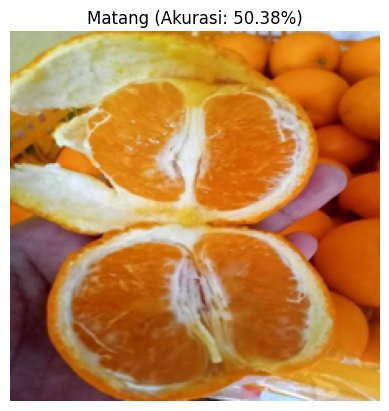

In [48]:
# Mengunggah gambar
uploaded_file = files.upload()

# Memprediksi kelas gambar
for file_name in uploaded_file.keys():
    img_path = file_name
    img = Image.open(img_path)
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)

    # Menampilkan gambar dan label prediksi
    if prediction[0][0] > prediction[0][1]:
        label = 'Matang'
        accuracy = prediction[0][0] * 100
    else:
        label = 'Mentah'
        accuracy = prediction[0][1] * 100

    plt.imshow(img_array[0,:,:,:])
    plt.title(label + " (Akurasi: {:.2f}%)".format(accuracy))
    plt.axis('off')
    plt.show()